<a href="https://colab.research.google.com/github/abhishekpadghane/demo/blob/master/XOR%20Classification%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
fig = plt.figure()
%matplotlib inline

# XOR Classification Problem
In this, i will demostrate XOR gate problem, why **Single Layer Perceptron** can't clasify this kind of data and the solution we got using ** Multi Layer Perceptron**.

**SLP** are used to classify **Linearly Seperable data** like classifying labels using a **Line**. But XOR gate output is **not Linearly Separable**. Thats why we need to use a **MLP** which has atleast one **Hidden Layer** responsible of classifying **non linearly separable** data.

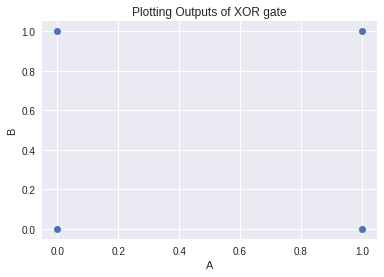

In [101]:
# Creating Input Matrix X, Output vector y.
# XOR gate output is 0,1,1,0 for combinations (0,0), (0,1), (1,0), (1,1)

X = np.array([[0,0,1,1], [0,1,0,1]]).reshape(2,-1).T
y = np.array([0,1,1,0]).reshape(-1,1)

# Ploting the values

plt.plot(X.T[0], X.T[1], 'o')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Plotting Outputs of XOR gate')
fig.canvas.draw()

In [0]:
# Creating Weights, we have two sets of Weights because we have one Hidden layer
# Coz we have 2 inputs units on our Input layer and 2 hidden units on our Hidden layer,
# so, our weights for hidden layer is 2x2 = 4
# Note, Weights are Random Initialization, in my case iam picking random samples from Uniform Distribution,
# its not neccesary to pick from below distribution, any random value is applicable

Weights_HL = np.random.uniform(size=(2,2))

# As i mention we have one hidden layer, it means two sets of Weights,
# Weights for hidden layer is done, now i will create weights for output layer
# we have 1 output but 2 hidden units in our hidden layer, thats why output layer weights are 2x1 = 2

Weights_OL = np.random.uniform(size=(2,1))

# Actual function for each neuron is W.TX + b in which b is bias (intercept)
# so we need to create bias
# first i will create bias for hidden layer
# number of bias depends on output to the another layer
# for hidden layer, we have 2 hidden layer units, so bias for hidden layer is 2
# Note, most of the cases bias is 1, but it can be any random assingnment

Bias_HL = np.random.uniform(size=(2,1))

# for output layer, we have 1 output, so bias is 1

Bias_OL = np.random.uniform(size=(1,1))

# creating hidden layer. we have 1 hideen layer with 2 hidden units,
# therefore size of hidden layer is 2x1 = 2
# Note, hiden layer stores activation(W.TX + b), for initializaion, assing with any number

Hidden_Layer = np.random.uniform(size=(2,1))

# creating output layer. we have 1 output unit (y predicted/estimated) in output layer,
# therefore size of output layer is 1
# Note, output layer stores activation(W.TH + b), for initializaion, assing with any number

Output_Layer = np.random.uniform(size=(1,1))

## Feedforward Step
In this **Activated weighted sum** which is output of a layer is passed as input to the another layer. For first hidden layer, inputs are actual rows X corresponding to there y.

##Activation Funtion
Activation function is used to generate value for neuron which helps to classify the data. If Activation function is not given, then the model becomes **Regression model** in which relationship between X and y is figured, specially in the case of **continues data**.

Here we have classification problem, thats why we need a activation function. In this case, i am using **Sigmoid function** which penalize the input given to it into a probability ranging from 0 to 1.

In [0]:
# creating Activation function which in my case i am using is sigmoid, its defined as (1 + e ** (-x)) ** -1
# Derivative of Sigmoid is sigmoid(x) * (1 - sigmoid(x))

def Sigmoid(x, diff=0):
  if diff == 1:
    return np.multiply(Sigmoid(x), np.subtract(1, Sigmoid(x)))
  
  return np.divide(1, np.add(1, np.exp(-x)))

# Note, output of Sigmoid is between 0 and 1
# Note, any other activation function is also applicable

In [0]:
# creating feedforward step for neural network
# functionality of this step is alredy discussed above in hidden and output layer

def Feedforward(X, W_HL, W_OL, B_HL, B_OL):
  HL = Sigmoid(W_HL.T.dot(X) + B_HL)
  OL = Sigmoid(W_OL.T.dot(HL) + B_OL)
  return HL, OL

## Backpropagation step

In backpropagation, the weights of our network are adjusted while **minimizing the loss** of the model. Loss is error noted as difference between actual and predicted/estimated.

The algorithm used for adjusting the weights is **Gradient descent** in which we derive the derivative because we need slope of loss function to go the loss where loss is closer to zero.

The amount of iteration it requires for reaching to minimum loss is called **Traing iterations** or **epochs**.

The amount of step or fraction which is used to approximate the minimum loss is called **Learning rate** or **step size** dinoted by alpha or eita. 

In [0]:
# creating backpropagation step for neural network
# we will first update weights and biases of output layer then of the hidden layer
# because its in reverse fashion, therefore updation of output layer weights and bias comes first

def Backpropagation(X, y, W_HL, W_OL, B_HL, B_OL, HL, OL, alpha, epochs):
  
  # Error is Original minus predicted, in our model output layer has predicted value
  
  for i in range(epochs):
    
    # First we need results of hidden and output layer, therefore we are using feedforward
    
    HL, OL = Feedforward(X, W_HL, W_OL, B_HL, B_OL)
    
    # Calculating error, delta for Output layer weights and updating output layer bias
    
    Error = y - OL
    Delta_W_OL = np.multiply(Error, Sigmoid(OL, diff=1))
    B_OL += np.multiply(Error, alpha)
    
    # Calculating error, delta for Hidden layer weights and updating hidden layer bias
    
    Error = Delta_W_OL.dot(W_OL.T)
    Delta_W_HL = np.multiply(Error.T, Sigmoid(HL, diff=1))
    B_HL += np.multiply(Error.T, alpha)
    
    # Ealuating dot product with the inputs to the hidden and output layer
    
    Adjust_W_HL = X.dot(Delta_W_HL.T)
    Adjust_W_OL = HL.dot(Delta_W_OL)
    
    # Updating both the weights
  
    W_HL += np.multiply(Adjust_W_HL, alpha)
    W_OL += np.multiply(Adjust_W_OL, alpha)
    
  return W_HL, W_OL, B_HL, B_OL

In [97]:
# Passing the dataset and checking the predictions
# Note, alpha and epochs are hyperparameters which are selected by hit and trial 

alpha = 0.001
epochs = 7000

# For every X and y , we will train our neural network upto epochs 

for i in range(X.shape[0]):
  
  # Extracting X and y according to index (eg. if i equals 1 then X is [0,1] and y is [1])
  
  X_ = X[i].reshape(-1,1)
  y_ = y[i].reshape(-1,1)
  
  # Calling Backpropagation for training the model
  # it will return weights and biases adjusted according to epochs and the decresed loss
  
  Weights_HL, Weights_OL, Bias_HL, Bias_OL, = Backpropagation(X_, y_, Weights_HL, Weights_OL, Bias_HL, Bias_OL, Hidden_Layer, Output_Layer, alpha, epochs)
  
  # to get predicted value, we need forward pass, or activated result
  # for that forward pass is called which will provide predicted value according to the addjusted weights and biases
  
  HL, OL = Feedforward(X_, Weights_HL, Weights_OL, Bias_HL, Bias_OL)
  
  # printing the result
  
  print('X :', X_[0][0],' ',X_[1][0], ' y ', y_[0][0], ' y predicted ',OL[0][0])

X : 0   0  y  0  y predicted  0.008817584715394561
X : 0   1  y  1  y predicted  0.7385322014849243
X : 1   0  y  1  y predicted  0.9057911465483289
X : 1   1  y  0  y predicted  0.17250082215477497


# Conclusion

As we can see, training upto 7000 iteration, our model is giving good results. Remember, if iteration are increased, we will get result closest to actual target value (original y).